**Abdullah Shahzad**

Spring 2023

CS 252: Mathematical Data Analysis and Visualization

Project 3: Linear regression

QR-based linear regression and polynomial regression

In [292]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

- In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
    - `np.linalg.inv`
    - `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
    - `np.linalg.norm`
    - `scipy.linalg.solve_triangular`, 

## Task 4: Implement a QR based linear regression solver

### 4a) QR-decomposition

- Write algorithm to compute QR decomposition (`linear_regression::qr_decomposition`). **Run test code below.** Equation for R: $$R = Q^TA$$
- Implement `linear_regression::linear_regression_qr` to use the QR decomposition to do the linear regression. Recall that the equation is $$Rc = Q^Ty$$ which can be solved without taking the inverse of $R$ through backsolving.

#### Test QR decomposition

In [293]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)

A = iris_data.select_data(['sepal_length', 'petal_width'])
A1 = np.hstack([A, np.ones([len(A), 1])])

lin_reg_qr = linear_regression.LinearRegression(iris_data)
myQ, myR = lin_reg_qr.qr_decomposition(A1)

Q, R = np.linalg.qr(A1)

print(f'Your Q shape is {myQ.shape} and should be {Q.shape}')
print(f'Your R shape is {myR.shape} and should be {R.shape}')
print(f'1st few rows of your Q are\n{myQ[:3]} and should be\n{Q[:3]}')
print('NOTE: It is fine if your Q numbers match in absolute value\nbut 1 or more COLUMNS are negated.')
print(f'\nYour R is\n{myR} and should be\n{R}')
print('NOTE: It is fine if your R numbers match in absolute value\nbut 1 or more ROWS are negated.\n')


Your Q shape is (150, 3) and should be (150, 3)
Your R shape is (3, 3) and should be (3, 3)
1st few rows of your Q are
[[ 0.07056 -0.11765  0.00009]
 [ 0.0678  -0.11202  0.0339 ]
 [ 0.06503 -0.10638  0.06772]] and should be
[[-0.07056 -0.11765 -0.00009]
 [-0.0678  -0.11202 -0.0339 ]
 [-0.06503 -0.10638 -0.06772]]
NOTE: It is fine if your Q numbers match in absolute value
but 1 or more COLUMNS are negated.

Your R is
[[72.27621 15.60873 12.12709]
 [-0.       7.66143 -1.22542]
 [-0.      -0.       1.19668]] and should be
[[-72.27621 -15.60873 -12.12709]
 [  0.        7.66143  -1.22542]
 [  0.        0.       -1.19668]]
NOTE: It is fine if your R numbers match in absolute value
but 1 or more ROWS are negated.



#### Test linear regression via QR decomposition

<class 'data.Data'>






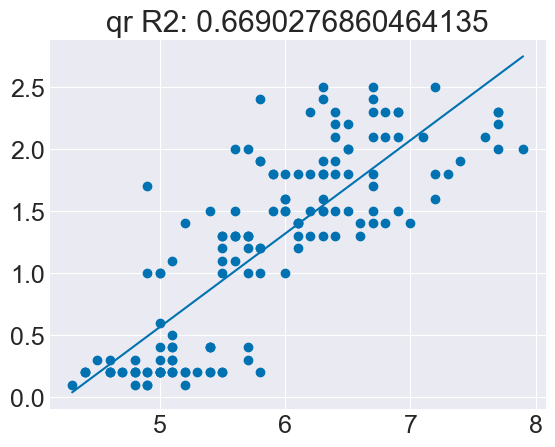

In [294]:
lin_reg_qr.linear_regression(['sepal_length'], 'petal_width', 'qr')
lin_reg_qr.scatter('sepal_length', 'petal_width', 'qr')
lin_reg_qr.show()

**Question 4:** How do your results compare to the built-in SciPy solver? Is this what you expected? Why or why not?

**Answer 4:** The R2 val with the scipy solver came out to = 0.66902 and the R2 value with the qr solver came out to approximately the same value. This linear regression alo fit the data well and in a way that as similar to the scipy solver. This means that the qr solveris working well and as expected.  

### Task 4b) Compare performance of the linear regression methods

- In the cell below, load in the brain network `brain.csv` dataset.
- Create `Data` and `LinearRegression` objects.
- Load in the list of variable names in the brain dataset (62)
- Do multiple linear regressions, separately for each of the linear regression methods that you have implemented (including `scipy`): Set all brain data variables except for the last one as the independent variables, the last variable is the depenendent variable.
- Compute and print the mean squared error (MSE) in the predictions made by each linear regression model and the actual y values.

In [328]:
brain = d.Data('data/brain.csv')
brain_reg = linear_regression.LinearRegression(brain)

ind_vars = brain.get_headers()[:-1]

dep_var = brain.get_headers()[-1]

brain_reg.linear_regression(ind_vars, dep_var, method="normal")
print("Normal MSE ", brain_reg.mse)

brain_reg.linear_regression(ind_vars, dep_var, method="qr")
print("QR MSE ", brain_reg.mse)
brain_reg.linear_regression(ind_vars, dep_var, method="scipy")
print("Scipy MSE ", brain_reg.mse)

print("Actual y values\n", brain.select_data([dep_var]))



<class 'data.Data'>
['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1', '5', '5.1', '6', '6.1', '6.2', '6.3', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '9', '9.1', '10', '10.1', '11', '11.1', '12', '12.1', '12.2', '12.3', '12.4', '13', '13.1', '13.2', '13.3', '13.4', '13.5', '14', '14.1', '15', '15.1', '16', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6', '16.7', '17', '17.1', '17.2', '17.3', '17.4', '17.5']

['17.6\n']

norm
Normal MSE  22121.18082832217
<class 'data.Data'>
['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1', '5', '5.1', '6', '6.1', '6.2', '6.3', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '9', '9.1', '10', '10.1', '11', '11.1', '12', '12.1', '12.2', '12.3', '12.4', '13', '13.1', '13.2', '13.3', '13.4', '13.5', '14', '14.1', '15', '15.1', '16', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6', '16.7', '17', '17.1', '17.2', '17.3', '17.4', '17.5']

['17.6\n']

QR MSE  7.9568718487444475e-25
<class 'data.D

**Question 5:** What are the mean squared errors for each of the regression methods on the brain data? Which method(s) do best and which do the worst **and why**?

**Answer 5:** The mean squared errors are as follows:

Normal method: 206.01
QR Decomp. method: 2.57e-26
Scipy method: 3.78e-27

Scipy and QR decomposition have the least MSE and the normal method has the highest MSE. This is because the normal method utilizes inverses which make it numerically unstable, it also requires more computational power. The normal method also rounds values, resulting in the higher MSE. The scipy solver and QR decomposition, however, do not use inverses. The QR decomposition method, for example, uses an orthagonal matrix, an upper triangular matrix and backsolves to get the vector c, making it more accurate.

## Task 5: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$ 

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 5a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [329]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

AttributeError: 'Data' object has no attribute 'Data'

### 5b) Add support for polynomial regression

This can be performed in 3 steps:

1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
    - I suggest using your QR solver, but you could use any of the ones you have implemented.
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 5c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$. Use your QR solver.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

['X']

['Y']

['X']

['Y']

MSSE:  71.81095284569933


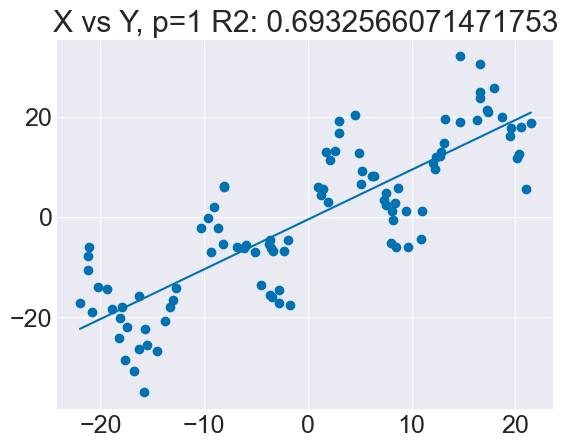

In [330]:
filename = 'data/poly_data.csv'
data = d.Data('data/poly_data.csv')
lin_reg = linear_regression.LinearRegression(data)
lin_reg.poly_regression('X', 'Y', p = 1)

lin_reg.scatter('X', 'Y', 'X vs Y, p=1')
print("MSSE: ", lin_reg.m_sse)

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 15$. 

*Your regression fit should not be a line!*

['X']

['Y']

['X']

['Y']

MSSE:  52.087523783733744


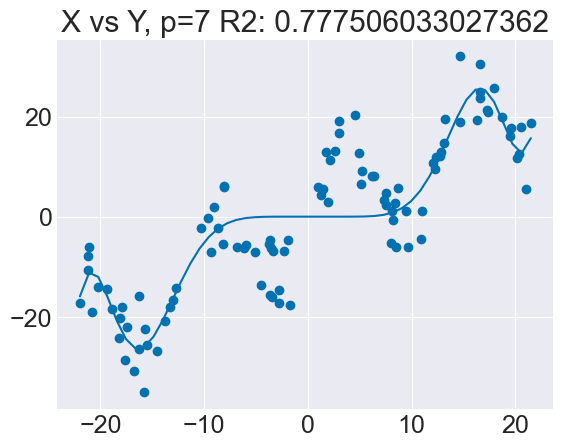

In [331]:
lin_reg = linear_regression.LinearRegression(data)
lin_reg.poly_regression('X', 'Y', p = 15)

lin_reg.scatter('X', 'Y', 'X vs Y, p=7')
print("MSSE: ", lin_reg.m_sse)

**Question 6:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 7:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 15.

**Answer 6:** It is better because r-squared is closer to 1.

**Answer 7:** Visually, as the polynomial degree is increased from 1 to 7, the variations in the data are represented in the data better so the fit follows the shape of the data more carefully. As the polynomial degree is increased from 1 to 7, r-squared becomes closer to 1 and MSE decreases, both signs of a better fit.  

## Task 6: Overfitting

In this task, you will experiment with how polynomial regression generals to data not used to fit the regression model.

### 6a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [332]:
filename = 'data/poly_data.csv'
fitSet = d.Data(filename)
fitSet.limit_samples(0, 50)

validationSet = d.Data(filename)
validationSet.limit_samples(50,100)

print("fit set: \n", fitSet)
print("\nvalidation set: \n", validationSet)

fit set: 
 data/poly_data.csv (50x2)
Headers:
X   Y

-------------------------------
Showing first 5/50 rows.
2.147   11.382   
9.465   1.034   
4.52   20.251   
1.974   2.89   
-3.358   -6.809   

validation set: 
 data/poly_data.csv (50x2)
Headers:
X   Y

-------------------------------
Showing first 5/50 rows.
-3.65   -4.658   
9.69   -6.107   
-21.986   -17.271   
-8.694   -2.22   
-15.536   -25.608   


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 6b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 15$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 15$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

['X']

['Y']

X

['Y']

['X']

['Y']



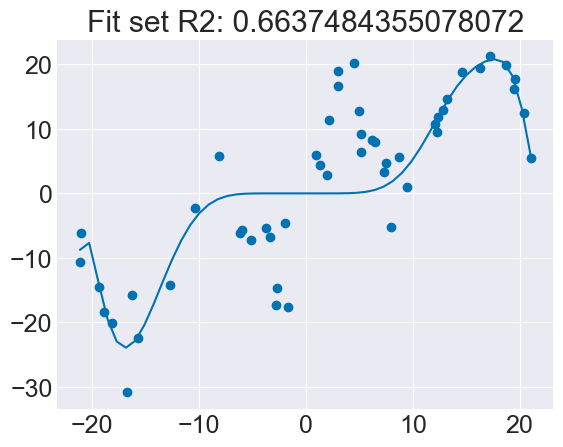

In [335]:
lin_reg = linear_regression.LinearRegression(fitSet)
lin_reg.poly_regression('X', 'Y', p = 15)
lin_reg_val = linear_regression.LinearRegression(validationSet)

lin_reg_val.initialize('X','Y',lin_reg.get_fitted_slope(), lin_reg.get_fitted_intercept(), lin_reg.p)
lin_reg.scatter('X','Y', 'Fit set')


['X']

['Y']

msse:  65.26616386055787
R2 0.7689427322685697


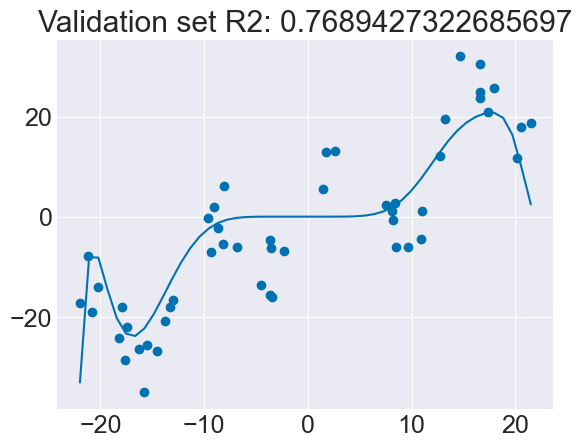

In [336]:
lin_reg_val.scatter('X','Y', 'Validation set')
print('msse: ',lin_reg_val.m_sse)
print('R2', lin_reg_val.R2)

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 15? Are Back up your observations with numbers (e.g. MSE).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree much above 15? Why do you think this happens? Back up your observations with numbers (e.g. MSE).

**Answer 8:** The fit does a relatively good job at generalizing the data, since the fit and validation sets follow relatively the same pattern so the slope, intercept and fitted coefficients from the fit should be relatively representative of the data.

**Answer 9:** 
p=1 R2_fit = 0.66, R2_validation = 0.69 MSE_fit = 59.6, MSE_validation = 88.6
p=2 R2_fit = 0.66, R2_validation = 0.69 MSE_fit = 59.4, MSE_validation = 88.3
p=3 R2_fit = 0.69, R2_validation = 0.67 MSE_fit = 53.5, MSE_validation = 93.1
p=4 R2_fit = 0.7, R2_validation = 0.68 MSE_fit = 52.6, MSE_validation = 91.4
p=5 R2_fit = 0.72, R2_validation = 0.72 MSE_fit = 49.8, MSE_validation = 79.8
p=6 R2_fit = 0.72, R2_validation = 0.72 MSE_fit = 49.7, MSE_validation = 79.2
p=7 R2_fit = 0.78, R2_validation = 0.66 MSE_fit = 38.3, MSE_validation = 96.5
p=8 R2_fit = 0.78, R2_validation = 0.66 MSE_fit = 38.2, MSE_validation = 95.5
p=9 R2_fit = 0.86, R2_validation = 0.86 MSE_fit = 23.1, MSE_validation = 37.8
p=10 R2_fit = 0.87, R2_validation = 0.83 MSE_fit = 22.6, MSE_validation = 46.2
p=11 R2_fit = 0.91, R2_validation = 0.69 MSE_fit = 14.4, MSE_validation = 86.2
p=12 R2_fit = 0.87, R2_validation = 0.68 MSE_fit = 22.6, MSE_validation = 88.5
p=13 R2_fit = 0.72, R2_validation = 0.22 MSE_fit = 48.5, MSE_validation = 218
p=14 R2_fit = 0.67, R2_validation = 0.47 MSE_fit = 57.2, MSE_validation = 147
p=15 R2_fit = 0.66, R2_validation = 0.76 MSE_fit = 58.9, MSE_validation = 65.2
Generally the MSSE is decreasing for the fit until p =13 and either remains in the same range or decreases for the validation set. At p=13, the values of the MSE of the validation set spike, possibly because of overfitting.
Generally the R-squared either remains in the same range or increases closer to 1 up to p=11 and starts decreasing again after that for the fit set. For the validation set, the value of R2 decreases at first, up till p=13 and then starts increasing again. So overall the fit is becoming better at generalizing the validation set for p <13.

**Answer 10:** 
The polynomials that result in explaining the trend well will approximate the best fitted coefficients, slope and intercept to approximate the validation set the best. Out of these p values that we tried, the range p=4 or p=5 yield the best results, giving the lowest (closest to 0) results for MSSE and the highest (closest to 1) results for R-sqaured for both the fit and validation data. 

**Answer 11:**
The R-squared further increases closer to 1 and MSSE further decreases to 0 till p=9, when R2 = 0.82, MSSE = 37.19. However if we further increase p after this, the R-squared starts decreasing and MSSE spikes so the fit becomes worse. This is probably because of overfitting.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

In [337]:
filename = 'data/ConditionsStatistics.csv'
data = d.Data(filename)
headers = data.get_headers()
headersWanted = [headers[12], headers[0], headers[17], headers[4]]
lin_reg = linear_regression.LinearRegression(data)
lin_reg.pair_plot(headersWanted, hists_on_diag=False, fig_sz=(20,20))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/ConditionsStatistics.csv'

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

**INTRODUCTION:**

I used these regressions methods to analyze the data set ConditionsStatistics.csv. I was able to use this to test some of my predictions for how these values are related. For reference, the data file represents different factors, in various states, like crime rate, education, wage statistics etc. in this US's history at 2 points in time 10 years apart. 

I predicted that a better funded police, i.e. higher value of expenditure on police and defense against crime (higher ExpenditureYear0 value) would mean that police officials would be better paid and would set a precedent for future years for better payment specifically at a time in the US 10 years later, thereby leading to higher value of ExpenditureYear10. 

I also wanted to explore if the expenditure of police (ExpenditureYear0) would be related to overall wage (Wage) statistics in a particular state at year 0. I predicted that a higher allocation of expenditure on police would lead to mean police officials would be better paid and would set a precedent for other professionals to also have higher wages. Hence, I predicted that these wages would be positively related to expenditure on police values in year0.

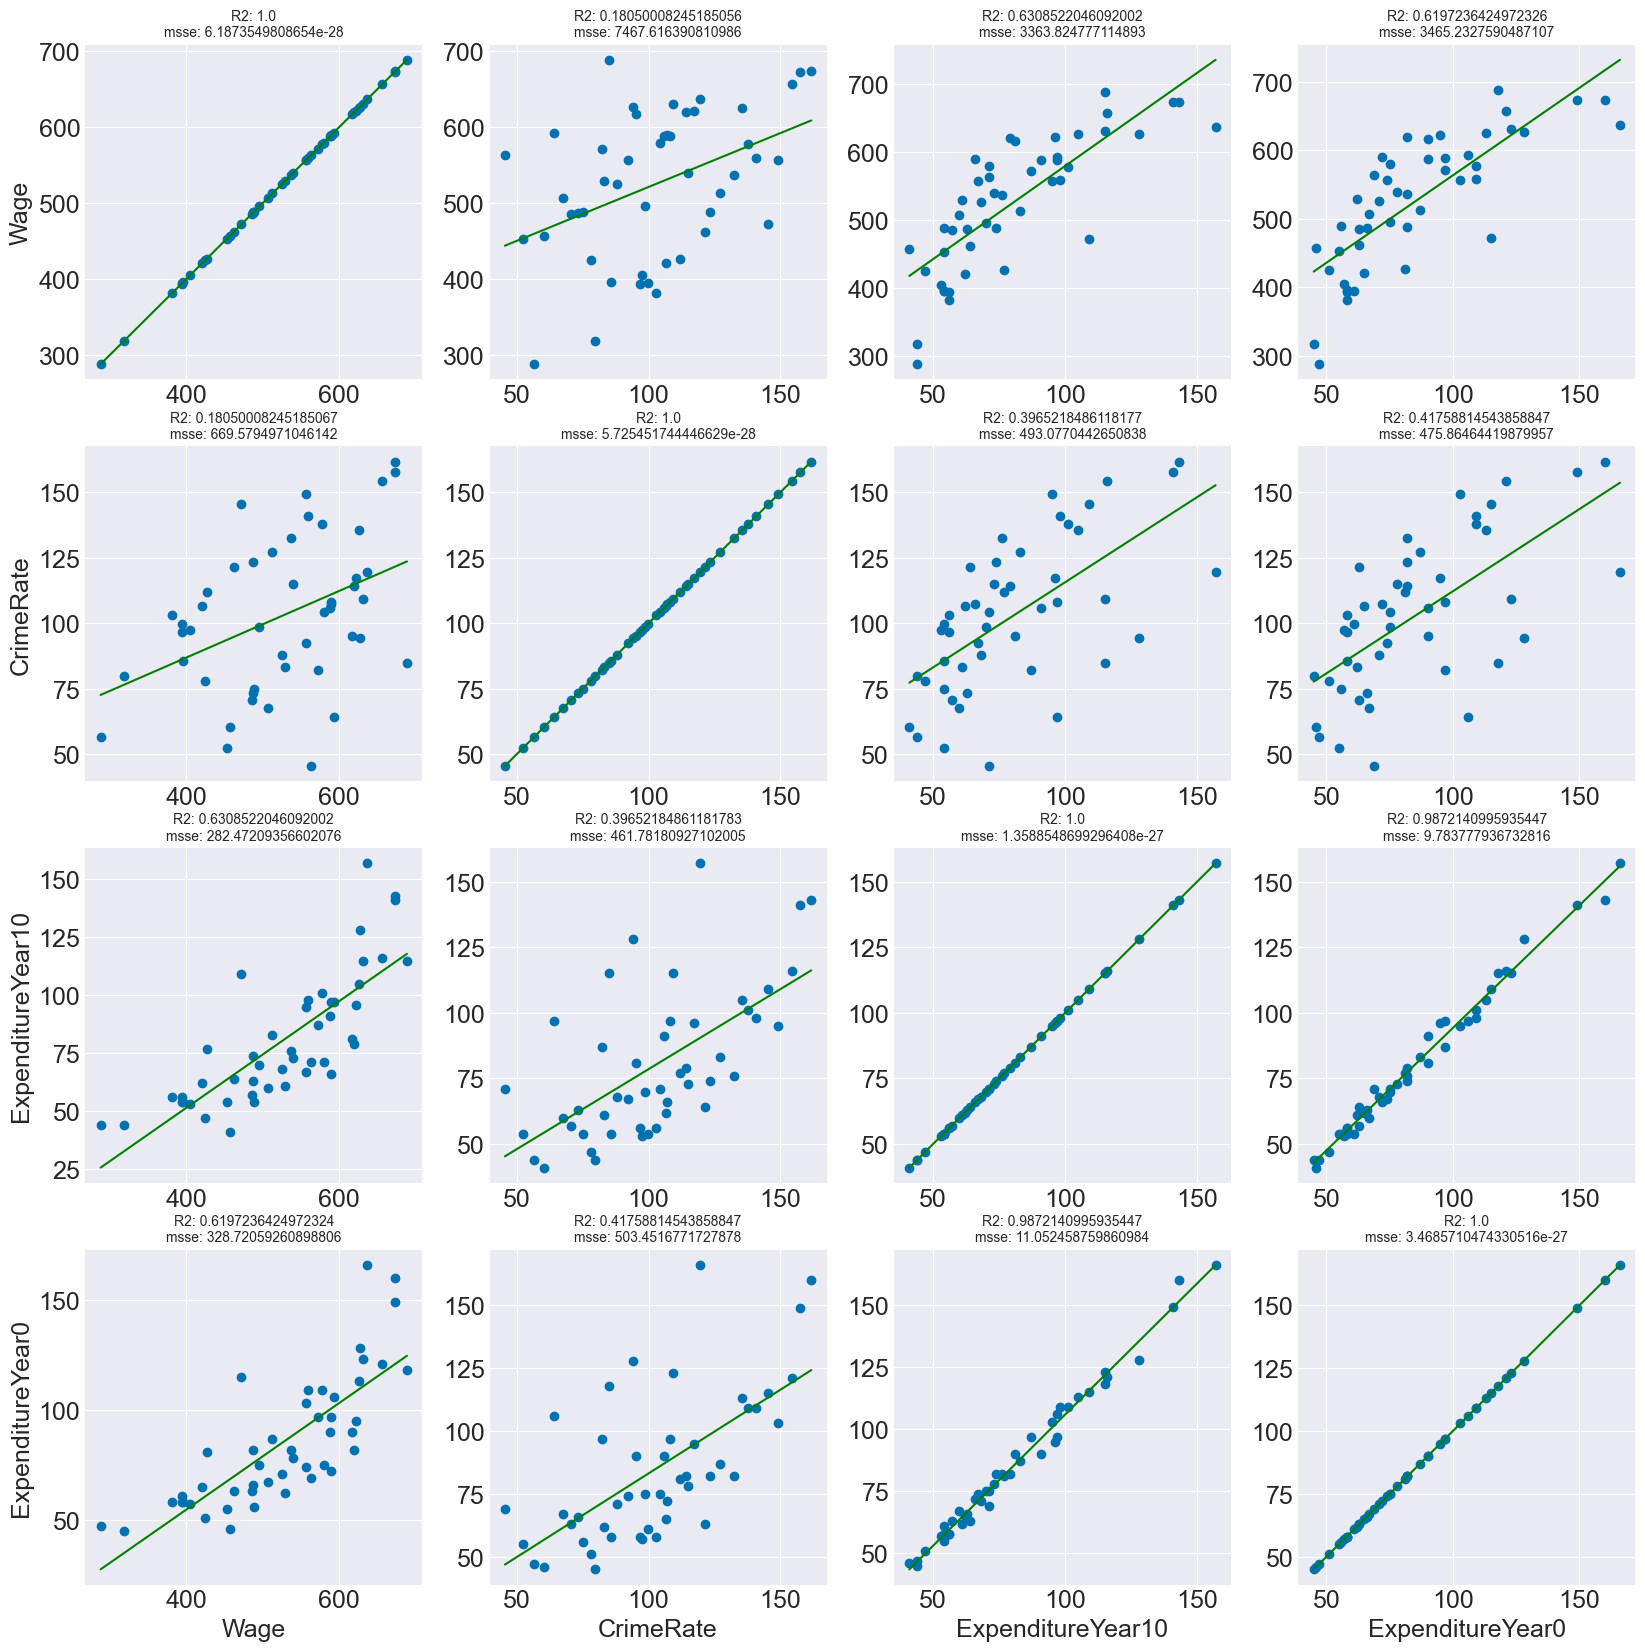

In [342]:
filename = 'data/ConditionsStatistics.csv'
data = d.Data(filename)
headers = data.get_headers()
headersWanted = [headers[12], headers[0], headers[17], headers[4]]
lin_reg = linear_regression.LinearRegression(data)
lin_reg.pair_plot(headersWanted, hists_on_diag=False, fig_sz=(20,20))
plt.show()

**Analysis**

I was able to use the pair plot (from the linear regression python file) on some of the headers from the ConditionsStatistics.csv file. This function creates a pair plot of the headers listed against each other but also adds a linear best fit line to each pair of axes. 

I saw that expenditure on police at these two points in history were in fact positively related, shown by the positively sloping linear regression best fit line. The line of best fit is also able to follow the data relatively well, with the r-squared value being 0.987 and the msse value being 9.78 for the year10 value on the y acis and year 0 value on the y axis. 

I also saw that the expenditure on police was positively related to the wage in the state in year 0, shown by the positively sloping linear regression best fit line. The line of best fit was less accurate in following the pattern of the data but was still pretty decent at it. The r-squared value for the analysis came out to be 0.620, a little on the lower side, and the msse value came out to be 328.72, very high compared to the expenditures on police plotted against each other. 

In [343]:
print(lin_reg.data)

data/ConditionsStatistics.csv (47x27)
Headers:
CrimeRate   Youth   Southern   Education   ExpenditureYear0   LabourForce   Males   MoreMales   StateSize   YouthUnemployment   MatureUnemployment   HighYouthUnemploy   Wage   BelowWage   CrimeRate10   Youth10   Education10   ExpenditureYear10   LabourForce10   Males10   MoreMales10   StateSize10   YouthUnemploy10   MatureUnemploy10   HighYouthUnemploy10   Wage10   BelowWage10

-------------------------------
Showing first 5/47 rows.
45.5   135.0   0.0   12.4   69.0   540.0   965.0   0.0   6.0   80.0   22.0   1.0   564.0   139.0   26.5   135.0   12.5   71.0   564.0   974.0   0.0   6.0   82.0   20.0   1.0   632.0   142.0   
52.3   140.0   0.0   10.9   55.0   535.0   1045.0   1.0   6.0   135.0   40.0   1.0   453.0   200.0   35.9   135.0   10.9   54.0   540.0   1039.0   1.0   7.0   138.0   39.0   1.0   521.0   210.0   
56.6   157.0   1.0   11.2   47.0   512.0   962.0   0.0   22.0   97.0   34.0   0.0   288.0   276.0   37.1   153.0   11.0   44.

**POLYNOMIAL REGRESSION MODELS FOR 'WAGE' VS 'EXPENDITUREYEAR0' FOR P=1 TO P=9**

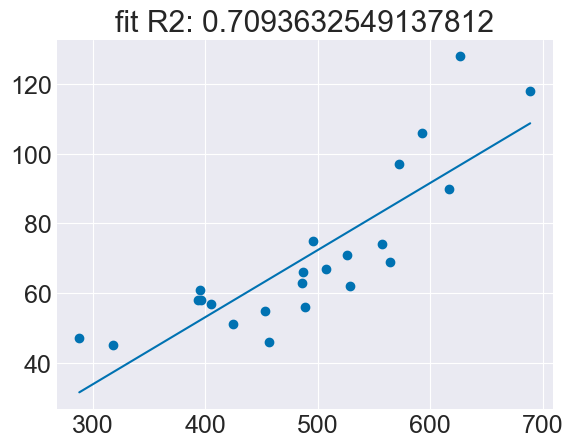

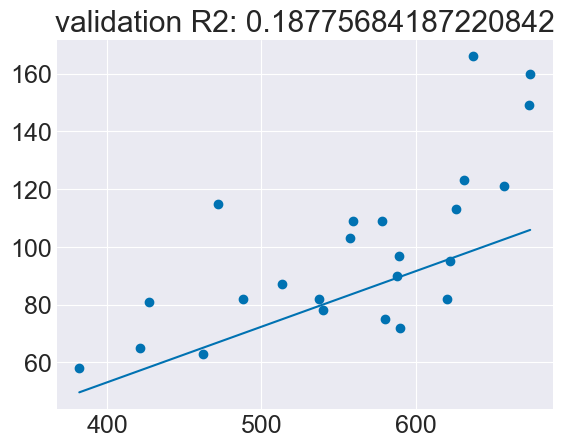

fit_msse:  143.0394288406186
validation_msse:  668.5085524597226


In [349]:
data = d.Data(filename)
N = data.get_num_samples()
data.limit_samples(0,int(N/2))
fit_set = data
data = d.Data(filename)
data.limit_samples(int(N/2),int(N+1))
validation_set = data

fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',1)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,1)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()

fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_msse: ',fit_mse)
print('validation_msse: ',validation_mse)

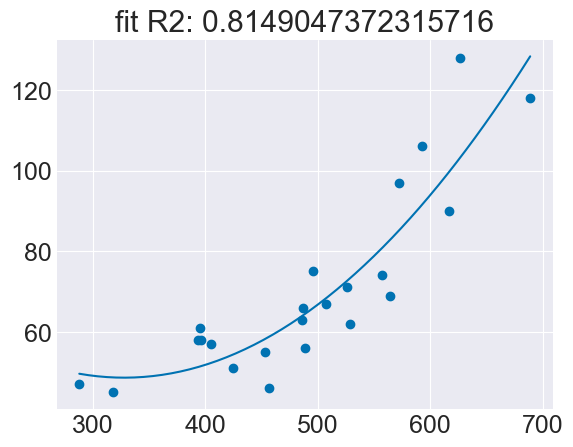

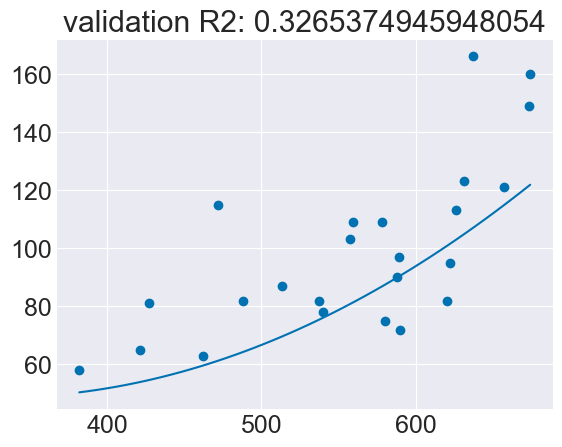

fit_mse:  91.09626059033246
validation_mse:  554.2865336804617


In [351]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',2)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,2)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()

fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

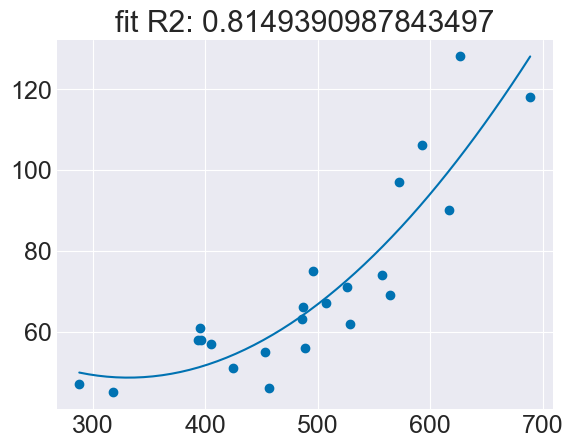

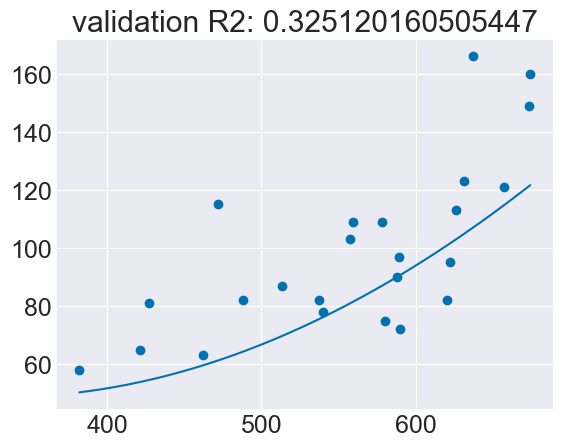

fit_mse:  91.07934925008885
validation_mse:  555.4530562309413


In [352]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',3)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,3)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()

fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

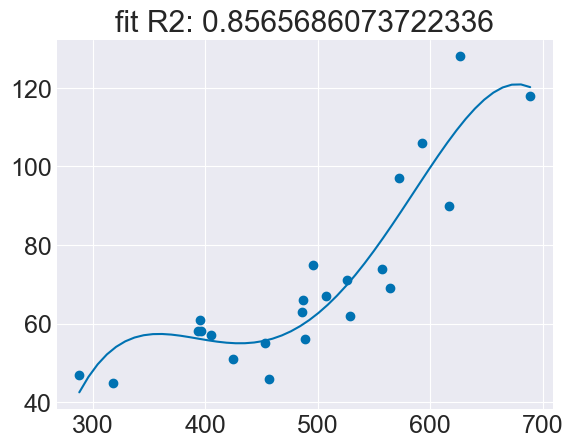

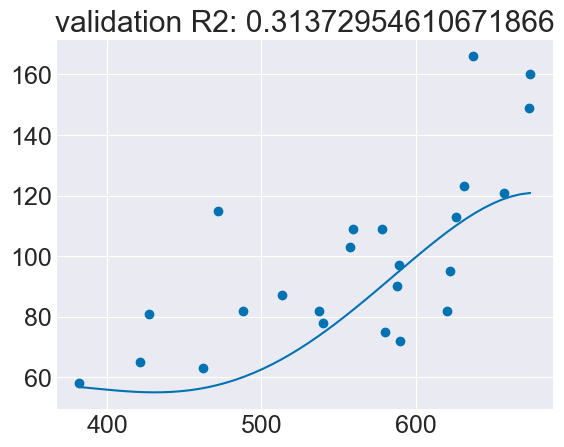

fit_mse:  70.59102066809875
validation_mse:  564.8279867146558


In [353]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',4)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,4)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()

fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

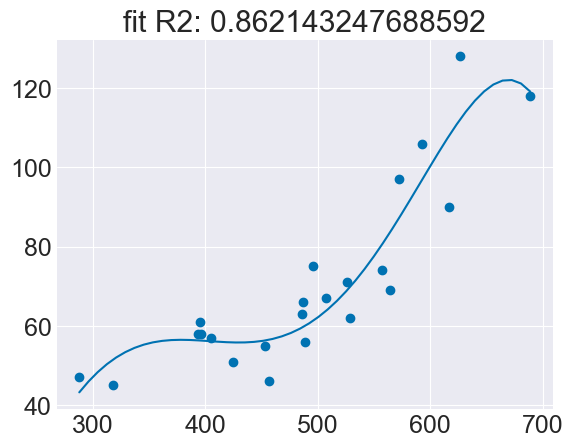

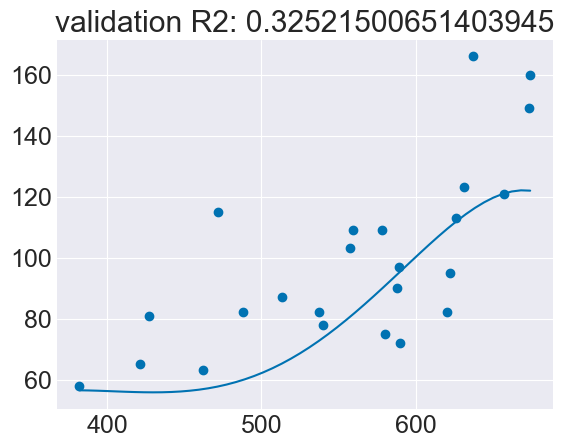

fit_mse:  67.84741243436619
validation_mse:  555.3749941786159


In [354]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',5)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,5)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()


fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

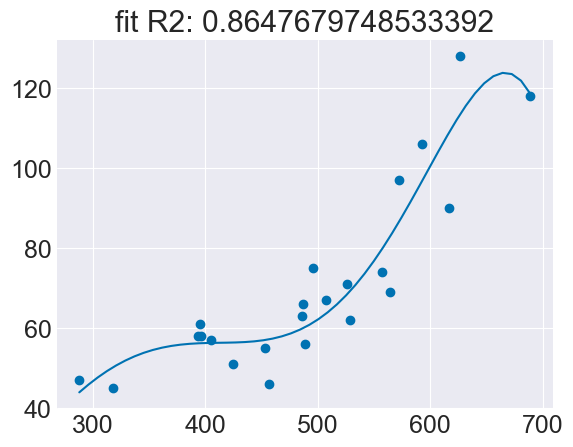

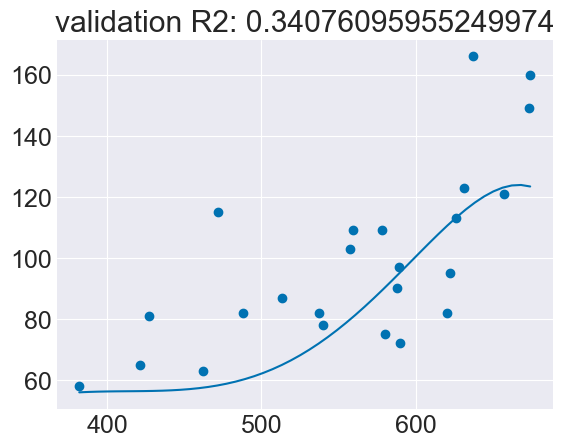

fit_mse:  66.55562988843745
validation_mse:  542.5800540694216


In [355]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',6)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,6)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()

fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

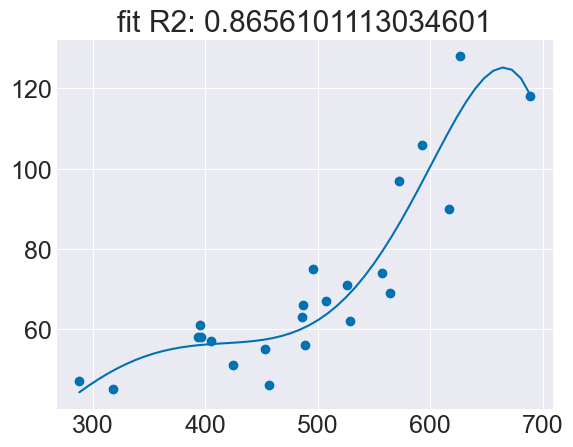

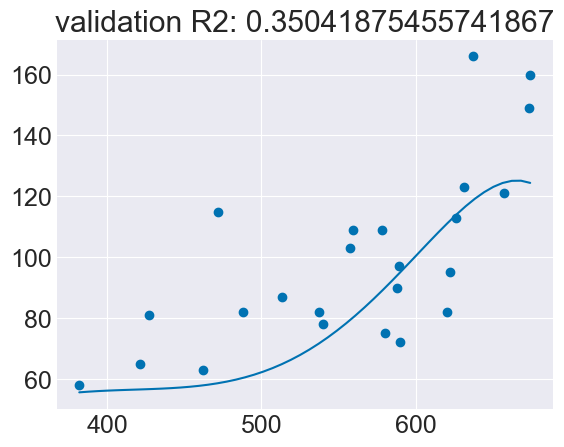

fit_mse:  66.14116503198782
validation_mse:  534.6313031392534


In [357]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',7)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,7)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()

fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

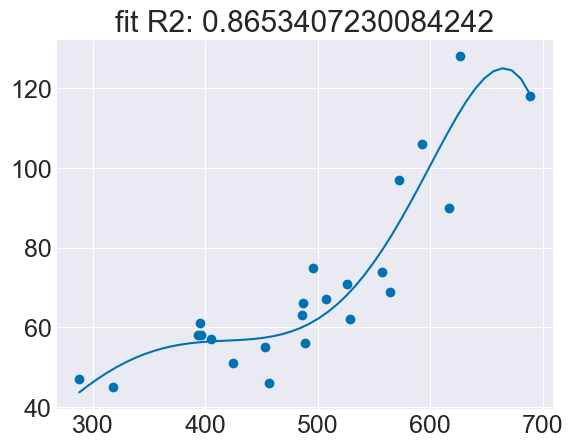

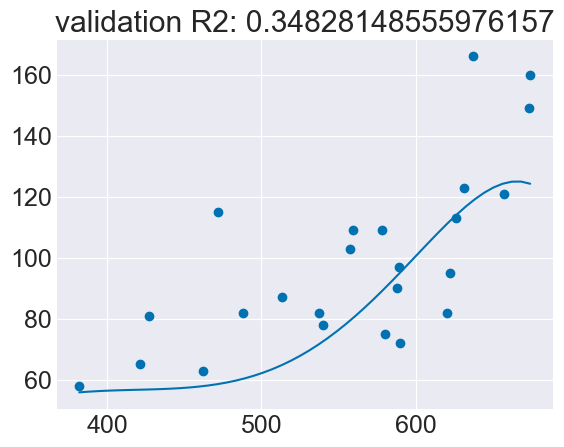

fit_mse:  66.27374684935869
validation_mse:  536.3903608666636


In [358]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',8)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,8)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()


fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

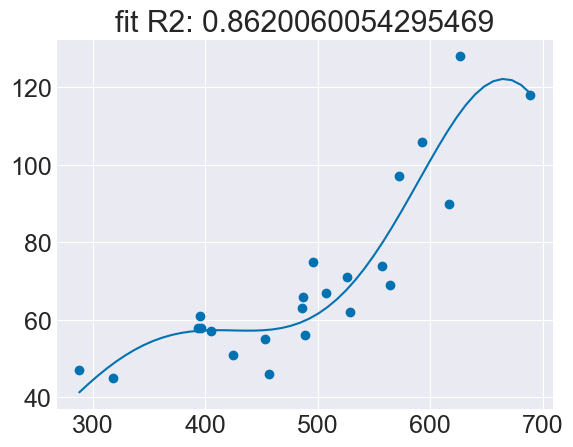

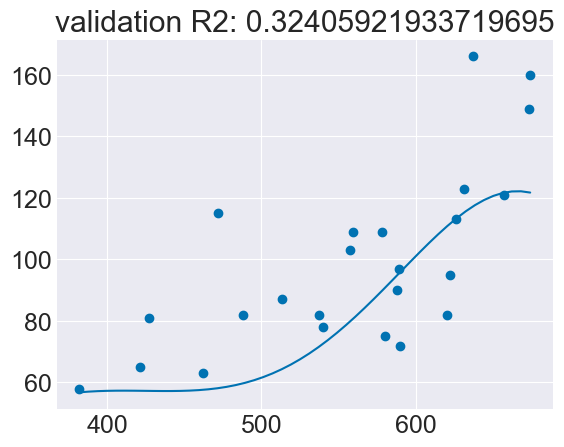

fit_mse:  67.91495741853801
validation_mse:  556.3262531763813


In [360]:
fit = linear_regression.LinearRegression(fit_set)
fit.poly_regression('Wage','ExpenditureYear0',9)
validation = linear_regression.LinearRegression(validation_set)

fit_slope = fit.get_fitted_slope()
fit_intercept = fit.get_fitted_intercept()
fit.scatter('Wage','ExpenditureYear0','fit')
fit.show()
validation.initialize(['Wage'],'ExpenditureYear0',fit_slope, fit_intercept,9)
validation.scatter('Wage','ExpenditureYear0','validation')
validation.show()


fit_mse = fit.compute_mse()
validation_mse = validation.compute_mse()
print('fit_mse: ',fit_mse)
print('validation_mse: ',validation_mse)

### 2. Linear regression algorithm comparison

- Compare the linear regression methods that you implemented on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.